# PA005: High Value Customer Indentification ( Insiders )

## Planejamento da Solução ( IOT )

### Input - Entrada

1. ***Problema de Negócio***
  - Selecionar os clientes mais valiosos para integrar um programa de Fidelização
   
2. ***Conjunto de Dados***
  - Vendas de um e-commerce online, durane o período de um ano.


### Output - Saída

1. A indicação das pessoas que farão parte do programa de Insiders


  - Lista: 
  
              client_id | is_insider  |
                104224  |   yes/1   
                332131  |   no/0


2. Relatório com as respostas das perguntas de negócio

- Quem são as pessoas elegíveis para participar do programa de Insiders ?
- Quantos clientes farão parte do grupo?
- Quais as principais características desses clientes ?
- Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?
- Qual a expectativa de faturamento desse grupo para os próximos meses ?
- Quais as condições para uma pessoa ser elegível ao Insiders ?
- Quais as condições para uma pessoa ser removida do Insiders ?
- Qual a garantia que o programa Insiders é melhor que o restante da base ?
- Quais ações o time de marketing pode realizar para aumentar o faturamento?


### Tasks - Tarefas

##### ***1. Quem são as pessoas elegíveis para participar do programa de Insiders ?***
- ***O que é ser elegível? O que são clientes de maior "valor"?***

- ***Faturamento:***

        - Alto Ticket Médio.
        - Alto LTV (Live Time Value).
        - Baixa Recência.
        - Alto Basket Size.
        - Baixa Probabilidade de Churn.
        - Previsão de LTV.
        - Alta propensão de compra.
- ***Custo:***

        - Baixo custo de devolução

- ***Experiência de compra:***

        - Média alta das avaliações
        

    
##### ***2. Quantos clientes farão parte do grupo?***


        - Número total de clientes
        - % do grupo de Insiders

##### ***3. Quais as principais características desses clientes ?***
- ***Escrever características do cliente:***

        - Idade
        - Localização
- ***Escrever características do consumo:***

        - Atributos de clusterização
        

##### ***4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?***

- ***Faturamento total do ano***

- ***Faturamento do grupo Insiders***


##### 5. ***Qual a expectativa de faturamento desse grupo para os próximos meses ?***

- ***LTV do grupo Insiders***

- ***Análise de Cohort*** 

##### 6. ***Quais as condições para uma pessoa ser elegível ao Insiders ?***

- ***Definir periodicidade ( 1 mês, 3 meses )***

- ***A pessoa precisa ser similar ou parecido com uma pessoa do grupo***

##### 7. ***Quais as condições para uma pessoa ser removida do Insiders ?***

- ***Definir periodicidade ( 1 mês, 3 meses )***

- ***A pessoa precisa ser dissimilar ou não parecida com uma pessoa do grupo***

##### 8. ***Qual a garantia que o programa Insiders é melhor que o restante da base ?***

- ***Teste A/B***

- ***Teste de Hipóteses***

##### 9. ***Quais ações o time de marketing pode realizar para aumentar o faturamento?***

- ***Desconto***
- ***Preferência de Compra***
- ***Frente***
- ***Visita***


## 0.0. Imports

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.display import HTML
from sklearn import cluster as c
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn import metrics as m
from sklearn import preprocessing as pp
from plotly import express as px
import umap.umap_ as umap

### 0.1. Helper Functions

In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline

    plt.style.use( 'ggplot' )
    plt.rcParams[ 'figure.figsize' ] = [24, 9]
    plt.rcParams[ 'font.size' ] = 24

    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )

    sns.set()

jupyter_settings() 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 0.2. Load Dataset

In [4]:
# load data
df_raw = pd.read_csv('/Users/thiago/Thiago/Data_Science/comunidade_ds/insiders_clustering/data/raw/ecommerce.csv', encoding='unicode_escape' )

# drop extra column
df_raw = df_raw.drop( columns=['Unnamed: 8'], axis=1 )

In [5]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## <font color='red'> 1.0. Descrição dos Dados </font>

In [6]:
df1 = df_raw.copy()

### 1.1. Rename Columns

In [7]:
cols_new = [ 'invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country' ]
df1.columns = cols_new

### 1.2. Data Dimensions

In [8]:
print( 'Number of rows: {}'.format( df1.shape[0] ) )
print( 'Number of cols: {}'.format( df1.shape[1] ) )

Number of rows: 541909
Number of cols: 8


### 1.3. Data Types

In [9]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

### 1.4. Check NA

In [10]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

### 1.5. Replace NA

In [11]:
# remove NA
df1 = df1.dropna( subset=['description', 'customer_id'] )
print( 'Removed Data: {:.2f}'.format( 1 - ( df1.shape[0] / df_raw.shape[0] ) ) )

Removed Data: 0.25


In [12]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

### 1.6. Change Types

In [13]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [14]:
# invoice_date
df1['invoice_date'] = pd.to_datetime( df1['invoice_date'], format='%d-%b-%y' )

# customer_id
df1['customer_id'] = df1['customer_id'].astype(int)

### 1.7. Descriptive Statistics

In [15]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

#### 1.7.1. Numerical Attributes

In [16]:
# central tendency - mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - desvio padrão, mínimo, máximo, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( np.min ) ).T
d3 = pd.DataFrame( num_attributes.apply( np.max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'mediana', 'std', 'skew', 'kurtosis']
m


,attributes,min,max,range,mean,mediana,std,skew,kurtosis
0,quantity,-80995.0,80995.0,161990.0,12.061303,5.00,248.693064,0.182663,94317.563673
1,unit_price,0.0,38970.0,38970.0,3.460471,1.95,69.315077,452.219019,246924.542988
2,customer_id,12346.0,18287.0,5941.0,15287.690570,15152.00,1713.598197,0.029835,-1.179982


#### <font color='red'> 1.7.1.1. Numerical Attributes - Investigating </font>

1. Quantidade negativa ( pode ser devolução?? )
2. Preço unitário igual a zero ( pode ser promoção?? )

#### 1.7.2. Categorical Attributes

In [17]:
cat_attributes.head()

,invoice_no,stock_code,description,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


<b>Invoice No</b>

In [24]:
# problema: Temos o invoice com letras e numeros
#df1['invoice_no'].astype( int )

# Identificação
df_letter_invoices = df1.loc[df1['invoice_no'].apply( lambda x: bool ( re.search( '[^0-9]+', x ) ) ), :]
df_letter_invoices.head()

print( 'Total number os invoices: {}'.format( len ( df_letter_invoices ) ) ) 
print( 'Total number os negative quantity: {}'.format( len( df_letter_invoices[df_letter_invoices['quantity'] < 0 ] ) ) )

Total number os invoices: 8905
Total number os negative quantity: 8905


In [56]:
#cat_attributes['invoice_no'].astype( int )
len( cat_attributes.loc[ cat_attributes['invoice_no'].apply( lambda x: bool( re.search( '[^0-9]+', x ) ) ), 'invoice_no'].drop_duplicates() )
#cat_attributes.loc[173995, : ]

3654

<b>Stock Code</b>

In [60]:
# stock code
#at_least_one_string = cat_attributes.loc[ cat_attributes['stock_code'].apply( lambda x: bool ( re.search( '[^0-9+]', x ) ) ), 'stock_code'].head()

#print( at_least_one_string )

#
#cat_attributes.loc[cat_attributes['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), 'stock_code'].unique() 
df1.loc[cat_attributes['stock_code'].apply( lambda x: bool( re.search( '^[a-zA-Z]+$', x ) ) ), :].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
45,536370,POST,POSTAGE,3,2016-11-29,18.00,12583,France
141,C536379,D,Discount,-1,2016-11-29,27.50,14527,United Kingdom
386,536403,POST,POSTAGE,1,2016-11-29,15.00,12791,Netherlands
1123,536527,POST,POSTAGE,1,2016-11-29,18.00,12662,Germany
2239,536569,M,Manual,1,2016-11-29,1.25,16274,United Kingdom


In [26]:
# check stock codes only characters
df1.loc[df1['stock_code'].apply( lambda x: bool ( re.search( '^[a-zA-Z]+$', x ) ) ), 'stock_code'].unique()

# Ação:
## 1. Remove stock_code in ['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK']

array(['POST', 'D', 'M', 'PADS', 'DOT', 'CRUK'], dtype=object)

<b>Description</b>

In [27]:
df1.head()

# Ação: deletar description

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


<b>Country</b>

In [34]:
len( df1['country'].unique() )

37

In [30]:
df1['country'].value_counts( normalize=True)

United Kingdom          0.889509
Germany                 0.023339
France                  0.020871
EIRE                    0.018398
Spain                   0.006226
Netherlands             0.005828
Belgium                 0.005086
Switzerland             0.004614
Portugal                0.003638
Australia               0.003095
Norway                  0.002669
Italy                   0.001974
Channel Islands         0.001863
Finland                 0.001708
Cyprus                  0.001529
Sweden                  0.001136
Austria                 0.000986
Denmark                 0.000956
Japan                   0.000880
Poland                  0.000838
USA                     0.000715
Israel                  0.000615
Unspecified             0.000600
Singapore               0.000563
Iceland                 0.000447
Canada                  0.000371
Greece                  0.000359
Malta                   0.000312
United Arab Emirates    0.000167
European Community      0.000150
RSA       

In [35]:
df1[['customer_id', 'country']].drop_duplicates().groupby( 'country' ).count().reset_index().sort_values( 'customer_id', ascending=False )

,country,customer_id
35,United Kingdom,3950
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,15
12,Finland,12
1,Austria,11


## <font color='red'> 2.0. Filtragem das Variáveis </font>

In [36]:
df2 = df1.copy()

In [37]:
# ===== Numerical Attributes ======
# unit price > 0.04
df2 = df2.loc[df2['unit_price'] > 0.04, :]

# ===== Categorical Attributes ======
# stock code != [ POST, D, M, DOT, CRUK ]
df2 = df2[~df2['stock_code'].isin( [ 'POST', 'D', 'M', 'DOT', 'CRUK', 'C2' ]) ] 

# description
df2 = df2.drop( columns='description', axis=1 )

# map
df2 = df2[~df2['country'].isin( ['European Community', 'Unspecified'] ) ]

## quantity - Negative numbers means product returns
df2_returns = df2.loc[df2['quantity'] < 0, :]
df2_purchase = df2.loc[df2['quantity'] >= 0, :]

## <font color='red'> 3.0. Feature Engineering </font>

In [63]:
df3 = df2.copy()

### 3.1. Feature Creation

In [64]:
# data reference
df_ref = df3.drop( ['invoice_no', 'stock_code','quantity', 'invoice_date', 'unit_price', 'country' ], axis=1 ).drop_duplicates( ignore_index=True)

In [65]:
# Gross Revenue ( Faturamento ) quantity * price
df2_purchase.loc[:, 'gross_revenue'] = df2_purchase.loc[:, 'quantity'] * df2_purchase.loc[:, 'unit_price']

# Monetary
df_monetary = df2_purchase.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id').sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, how='left', on='customer_id' )

# Recency - It depends on product returns
df_recency = df2_purchase.loc[:, ['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()
df_recency['recency_days'] = ( df2_purchase['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, how='left', on='customer_id' )

# Frequency - It depends os product returns

df_frequency = df2_purchase.loc[:, ['customer_id', 'invoice_no']].drop_duplicates().groupby( 'customer_id' ).count().reset_index()
df_ref = pd.merge( df_ref, df_frequency, how='left', on='customer_id' )

# Average Ticket
df_avg_ticket = df2_purchase.loc[:, ['customer_id', 'gross_revenue']].groupby( 'customer_id' ).mean().reset_index().rename( columns={'gross_revenue' : 'avg_ticket' } ) 
#df_avg_ticket['avg_ticket'] = np.round( df_avg_ticket['avg_ticket'], 2 )
df_ref = pd.merge( df_ref, df_avg_ticket, how='left', on='customer_id' )

# Number of returns
# df_returns = df2_returns.loc[:, ['customer_id', 'invoice_no']].drop_duplicates().groupby( 'customer_id' ).count().reset_index().rename( columns={'invoice_no': 'returns' } )
# df_ref = pd.merge( df_ref, df_returns, how='left', on='customer_id' )
# df_ref.loc[df_ref['returns'].isna(), 'returns'] = 0


/var/folders/w5/0w2xv4r95g1gfgbzpp2dm6gr0000gn/T/ipykernel_5584/3846973712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_purchase.loc[:, 'gross_revenue'] = df2_purchase.loc[:, 'quantity'] * df2_purchase.loc[:, 'unit_price']


In [66]:
df_ref.isna().sum()

customer_id       0
gross_revenue    27
recency_days     27
invoice_no       27
avg_ticket       27
dtype: int64

In [67]:
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket
0,17850,5391.21,372.0,34.0,18.152222
1,13047,3232.59,56.0,9.0,18.904035
2,12583,6705.38,2.0,15.0,28.902500
3,13748,948.25,95.0,5.0,33.866071
4,15100,876.00,333.0,3.0,292.000000


In [65]:
# # data reference

# df_ref = df3.drop( ['invoice_no', 'stock_code', 'description', 'quantity',
#                     'invoice_date', 'unit_price', 'country'],
#                      axis=1 ).drop_duplicates( ignore_index=True)

# df_ref.head()
# # Gross Renevue ( Faturamento - quantity * price)
# df3['gross_revenue'] = df3['quantity'] * df3['unit_price']

# # Monetary
# df_monetary = df3[['customer_id', 'gross_revenue']].groupby( 'customer_id' ).sum().reset_index()
# df_ref = pd.merge( df_ref, df_monetary, on='customer_id', how='left' )

# # Recency - Last Day Purchase
# df_recency = df3[['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()
# df_recency['recency_days'] = ( df3['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
# df_recency = df_recency[['customer_id', 'recency_days']].copy()
# df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )

# # Frequency
# df_freq = df3[['customer_id', 'invoice_no']].drop_duplicates().groupby( 'customer_id' ).count().reset_index()
# df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )

# # Avg Ticket
# df_avg_ticket = df3[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename( columns={'gross_revenue':'avg_ticket'} )
# df_ref = pd.merge( df_ref, df_avg_ticket, on='customer_id', how='left' )

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


## <font color='red'> 4.0. EDA ( Exploratory Data Analysis )</font>

In [68]:
df4 = df_ref.dropna().copy()

In [69]:
df4.isna().sum()

customer_id      0
gross_revenue    0
recency_days     0
invoice_no       0
avg_ticket       0
dtype: int64

## <font color='red'> 5.0. Data Preparation</font>

In [84]:
df5 = df4.copy()

In [85]:
df5.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket
0,17850,5391.21,372.0,34.0,18.152222
1,13047,3232.59,56.0,9.0,18.904035
2,12583,6705.38,2.0,15.0,28.902500
3,13748,948.25,95.0,5.0,33.866071
4,15100,876.00,333.0,3.0,292.000000


In [73]:
# ss = pp.MinMaxScaler()

# df5['gross_revenue'] = ss.fit_transform( df5[['gross_revenue']])
# df5['recency_days'] = ss.fit_transform( df5[['recency_days']])
# df5['invoice_no'] = ss.fit_transform( df5[['invoice_no']])
# df5['avg_ticket'] = ss.fit_transform( df5[['avg_ticket']])
#df5['returns'] = ss.fit_transform( df5[['returns']])

## <font color='red'> 6.0. Feature Selection</font>

In [86]:
df6 = df5.copy()

## <font color='red'> 7.0. Hyperparameter Fine-Tunning </font>

In [87]:
X = df6.drop( columns=['customer_id'] )

In [88]:
clusters = [2, 3, 4, 5, 6, 7]

### 7.1. Within-Cluster Sum of Square ( WSS )

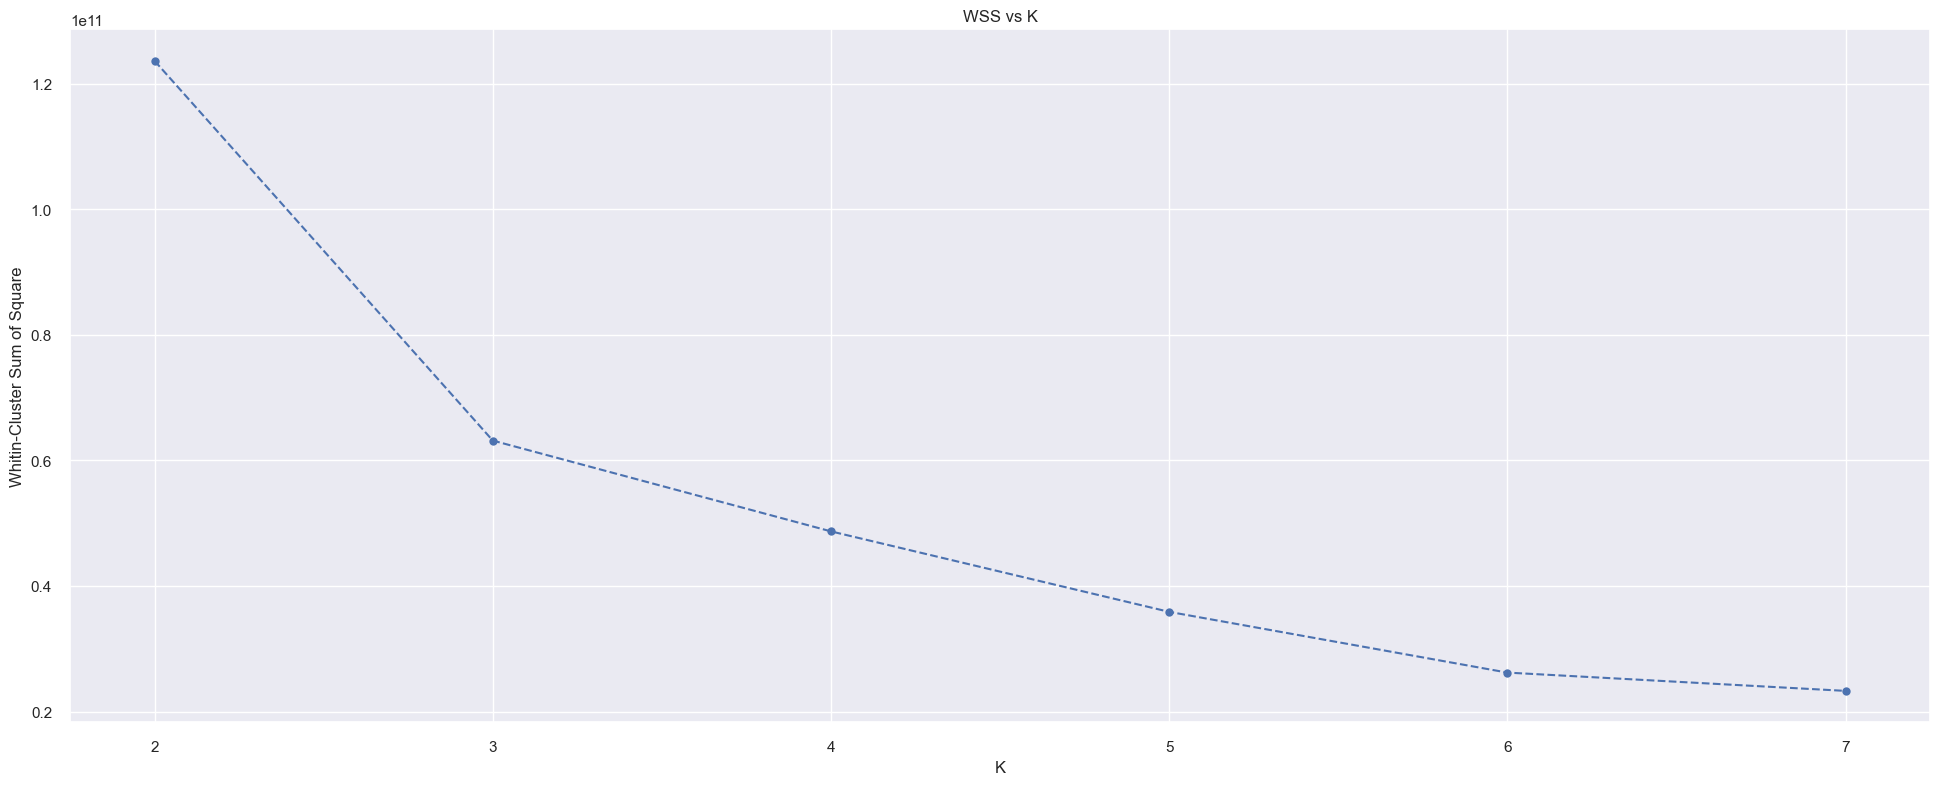

In [89]:
wss = []
for k in clusters:
    # model definition
    kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42 )

    # model training
    kmeans.fit( X )

    # validation
    wss.append( kmeans.inertia_ )

# plot wss - Elbow Method
plt.plot( clusters, wss, linestyle='--', marker='o', color='b' );
plt.xlabel( 'K' );
plt.ylabel( 'Whitin-Cluster Sum of Square' );
plt.title( 'WSS vs K');

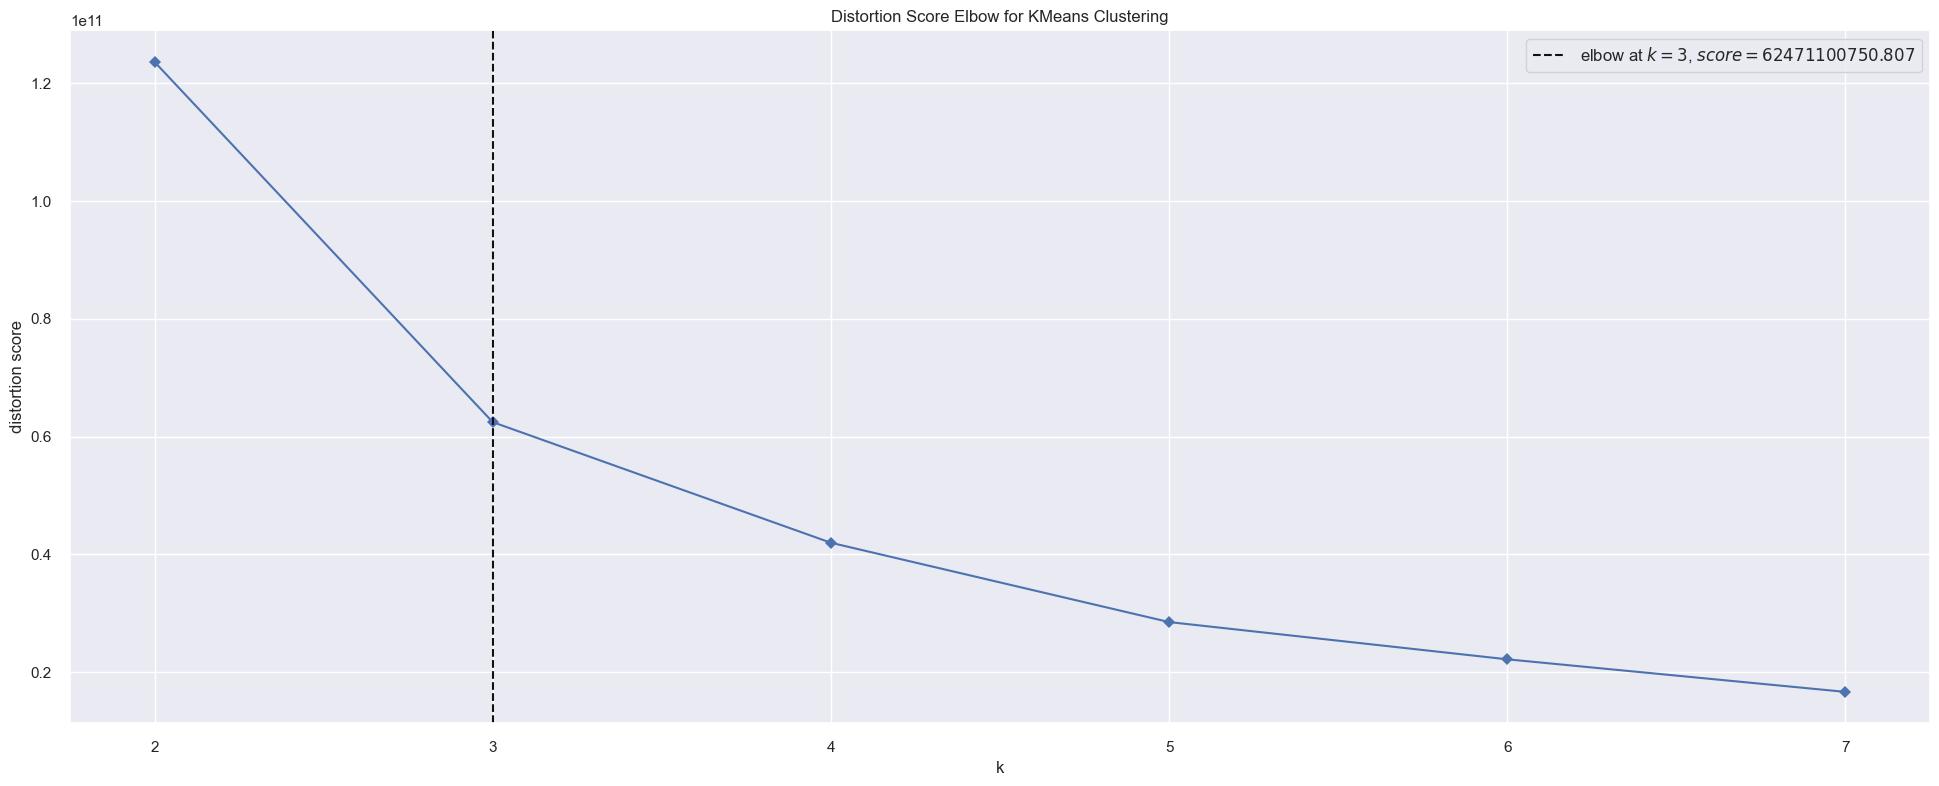

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [90]:
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, timings=False )
kmeans.fit( X )
kmeans.show()

### 7.2. Silhouette Score

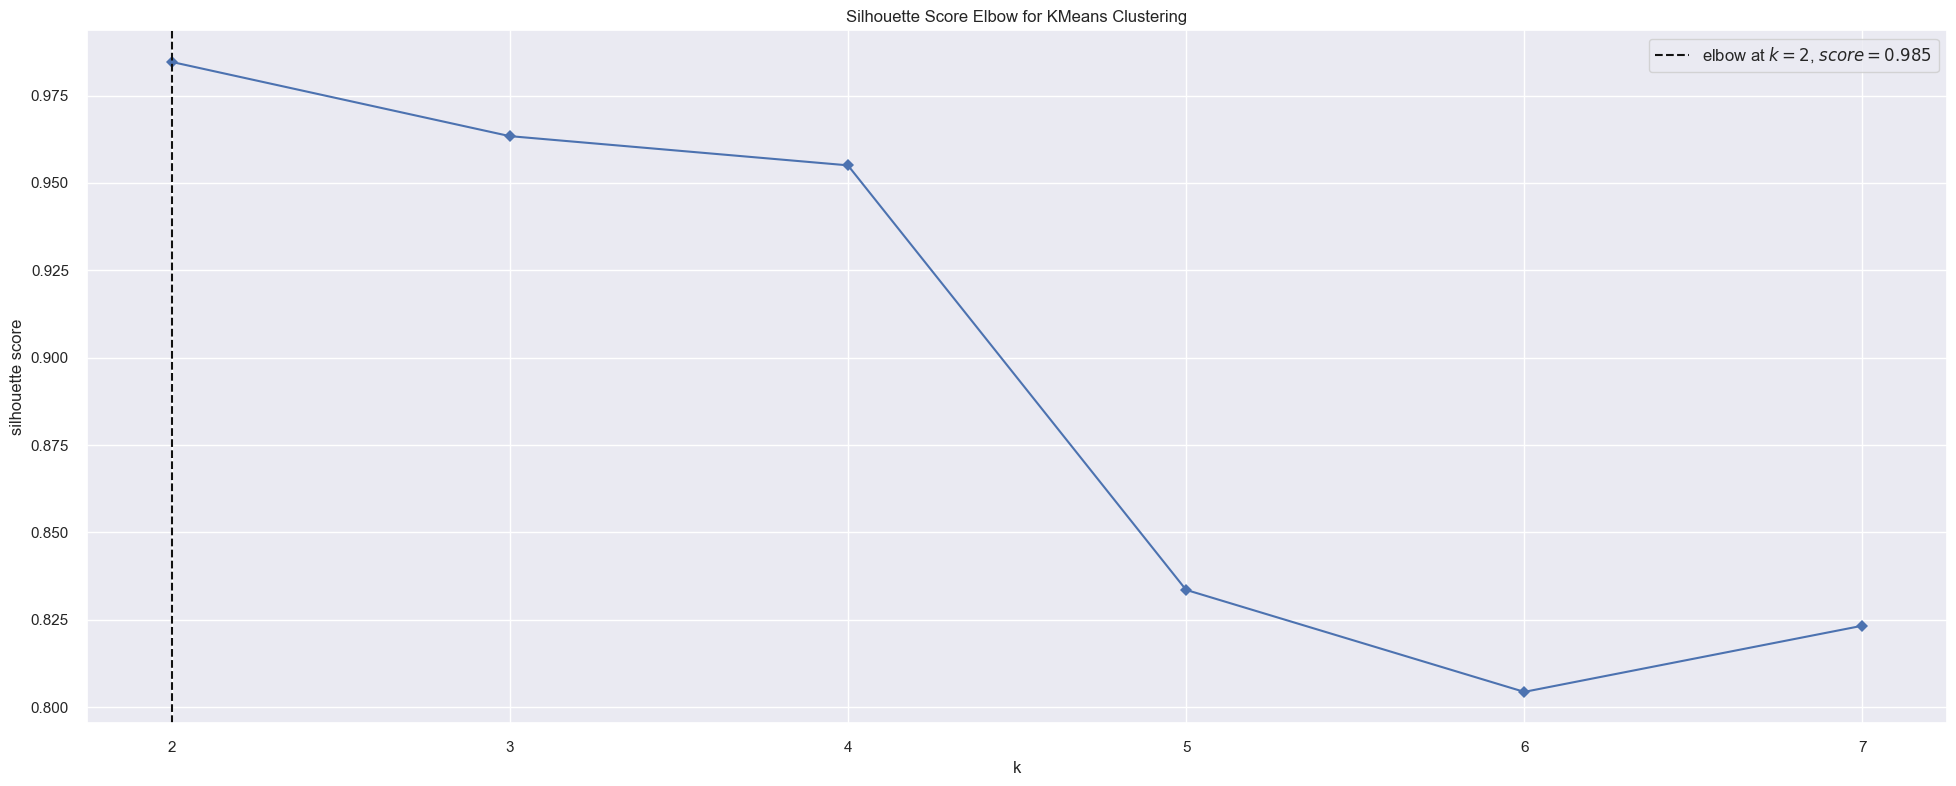

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [93]:
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, metric='silhouette',  timings=False )
kmeans.fit( X )
kmeans.show()

### 7.3 Silhouette Analysis

In [94]:
X.head()

,gross_revenue,recency_days,invoice_no,avg_ticket
0,5391.21,372.0,34.0,18.152222
1,3232.59,56.0,9.0,18.904035
2,6705.38,2.0,15.0,28.902500
3,948.25,95.0,5.0,33.866071
4,876.00,333.0,3.0,292.000000


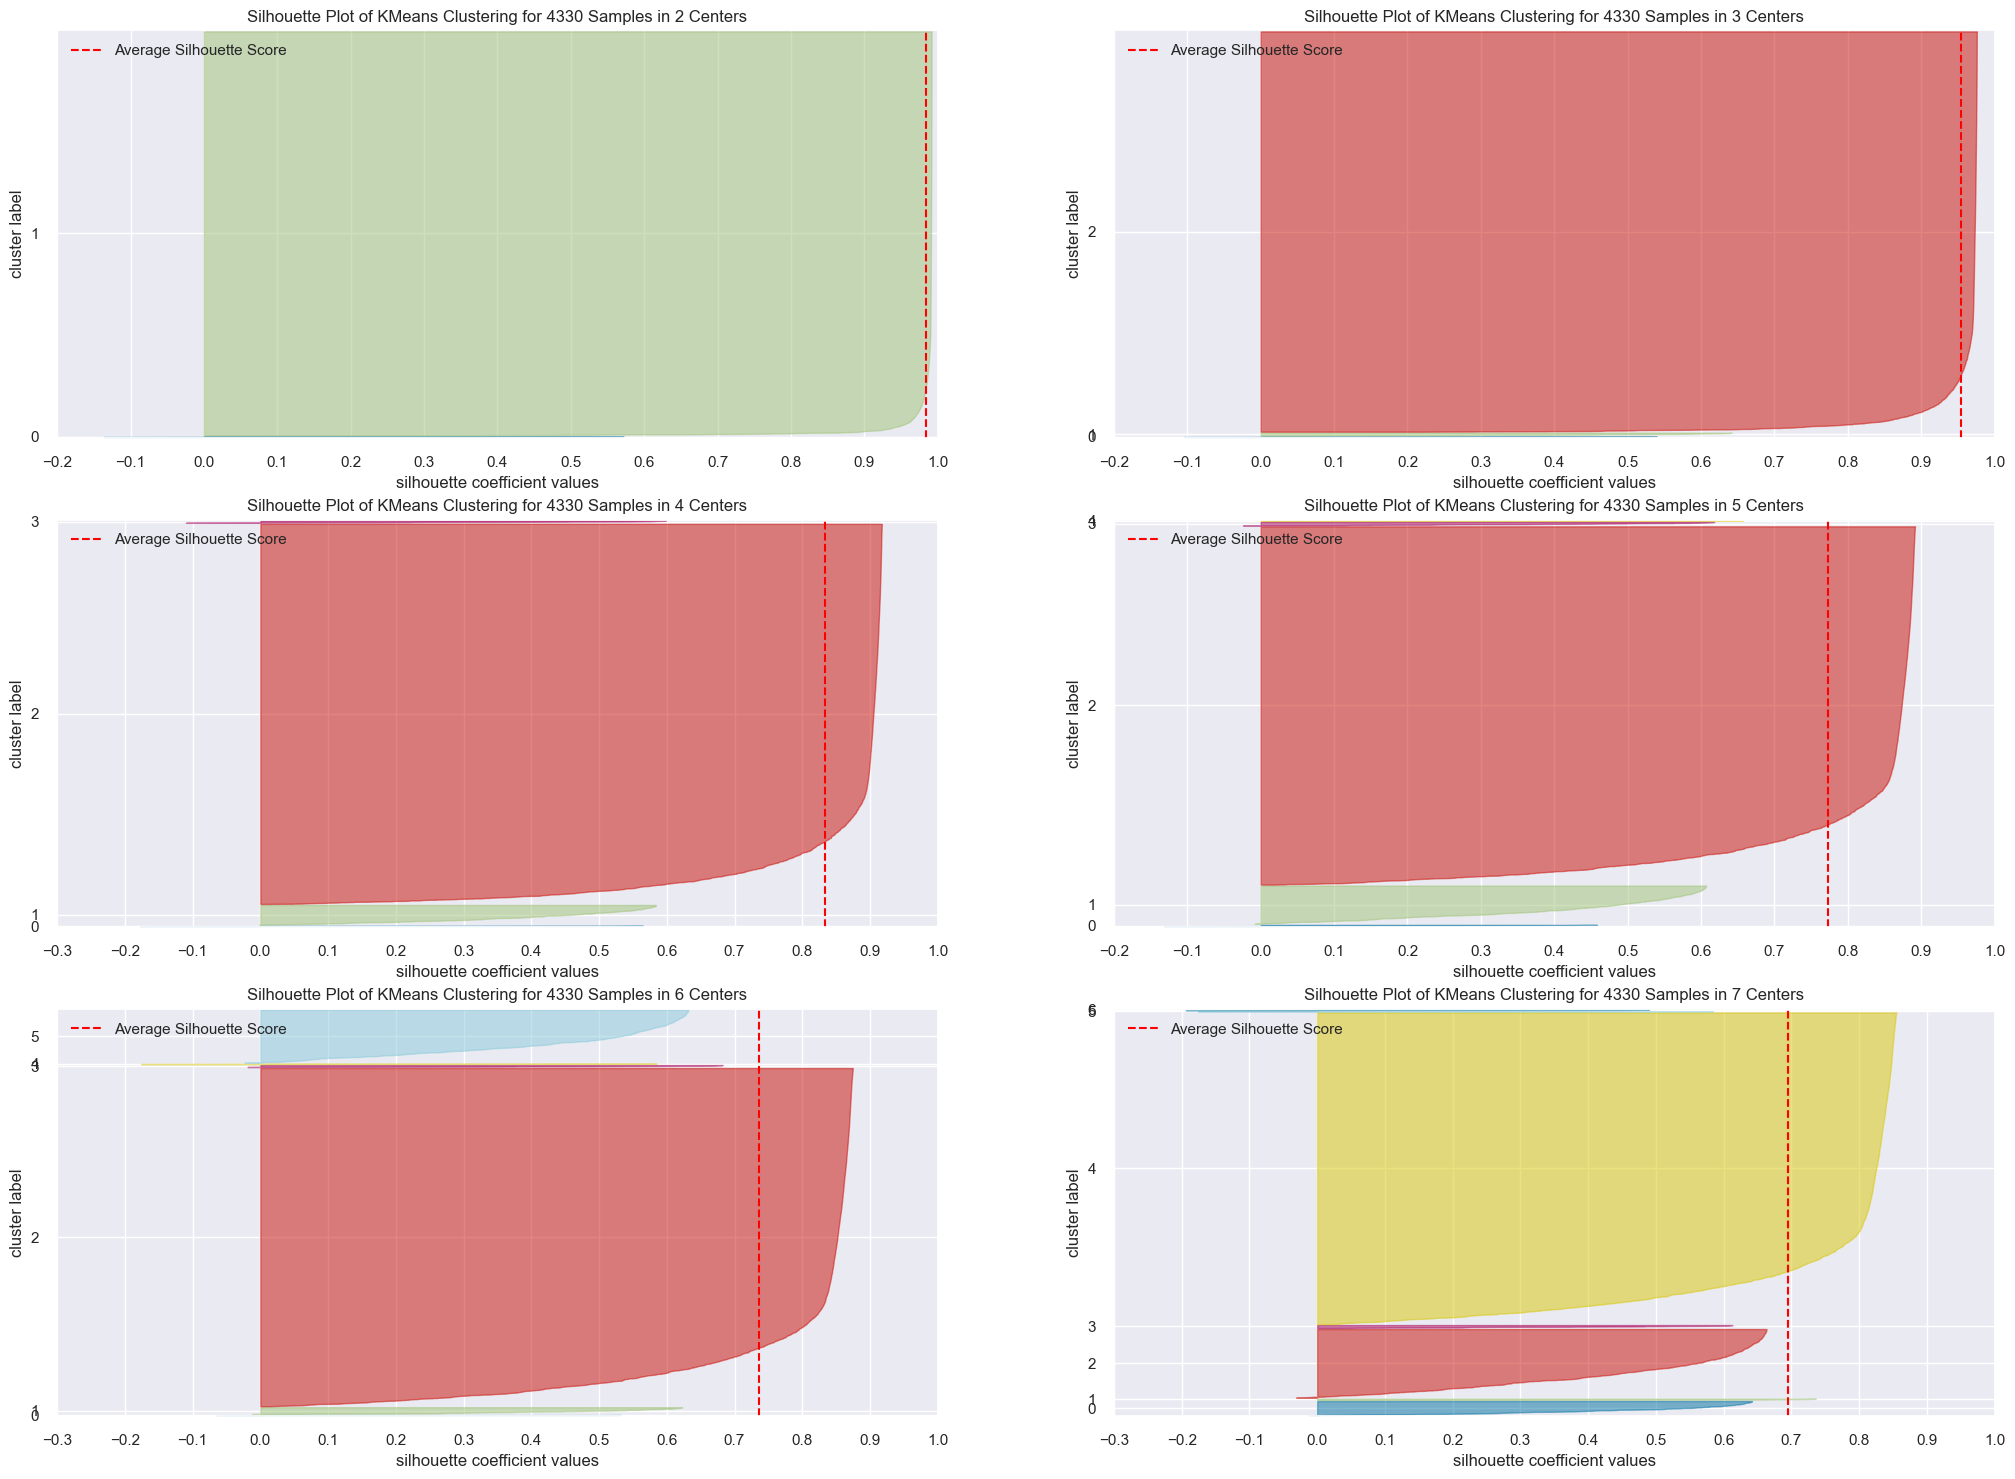

In [95]:
fig, ax = plt.subplots( 3, 2, figsize=(25, 18) )


for k in clusters:
    km = c.KMeans( n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42 )
    q, mod = divmod( k, 2 )

    visualizer = SilhouetteVisualizer( km, colors='yellowbrick', ax=ax[q-1][ mod ] )
    visualizer.fit ( X )
    visualizer.finalize()

## <font color='red'> 8.0. Model Training </font>

### 8.1. K-Means

In [99]:
# model definition
k = 5
kmeans = c.KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42 )

# model training
kmeans.fit( X )

# clustering
labels = kmeans.labels_

### 8.2. Cluster Validation

In [102]:
## WSS ( Within-Cluster Sum of Square )
print( 'WSS Value: {}'.format( kmeans.inertia_ ) )

## SS ( Silhouette Score )
print ( 'SS value: {}'.format( m.silhouette_score( X, labels, metric='euclidean' ) ) )

WSS Value: 35877922731.20051
SS value: 0.7731573494813923


## <font color='red'> 9.0. Cluster Analysis </font>

In [103]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5391.21,372.0,34.0,18.152222,1
1,13047,3232.59,56.0,9.0,18.904035,2
2,12583,6705.38,2.0,15.0,28.902500,1
3,13748,948.25,95.0,5.0,33.866071,2
4,15100,876.00,333.0,3.0,292.000000,2


### 9.1. Visualization Inspection

In [104]:
#fig = px.scatter_3d( df9, x='recency_days', y='invoice_no', z='gross_revenue', color='cluster' )
#fig.show()

/Users/thiago/Thiago/Data_Science/comunidade_ds/insiders_clustering/ins_clustenv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


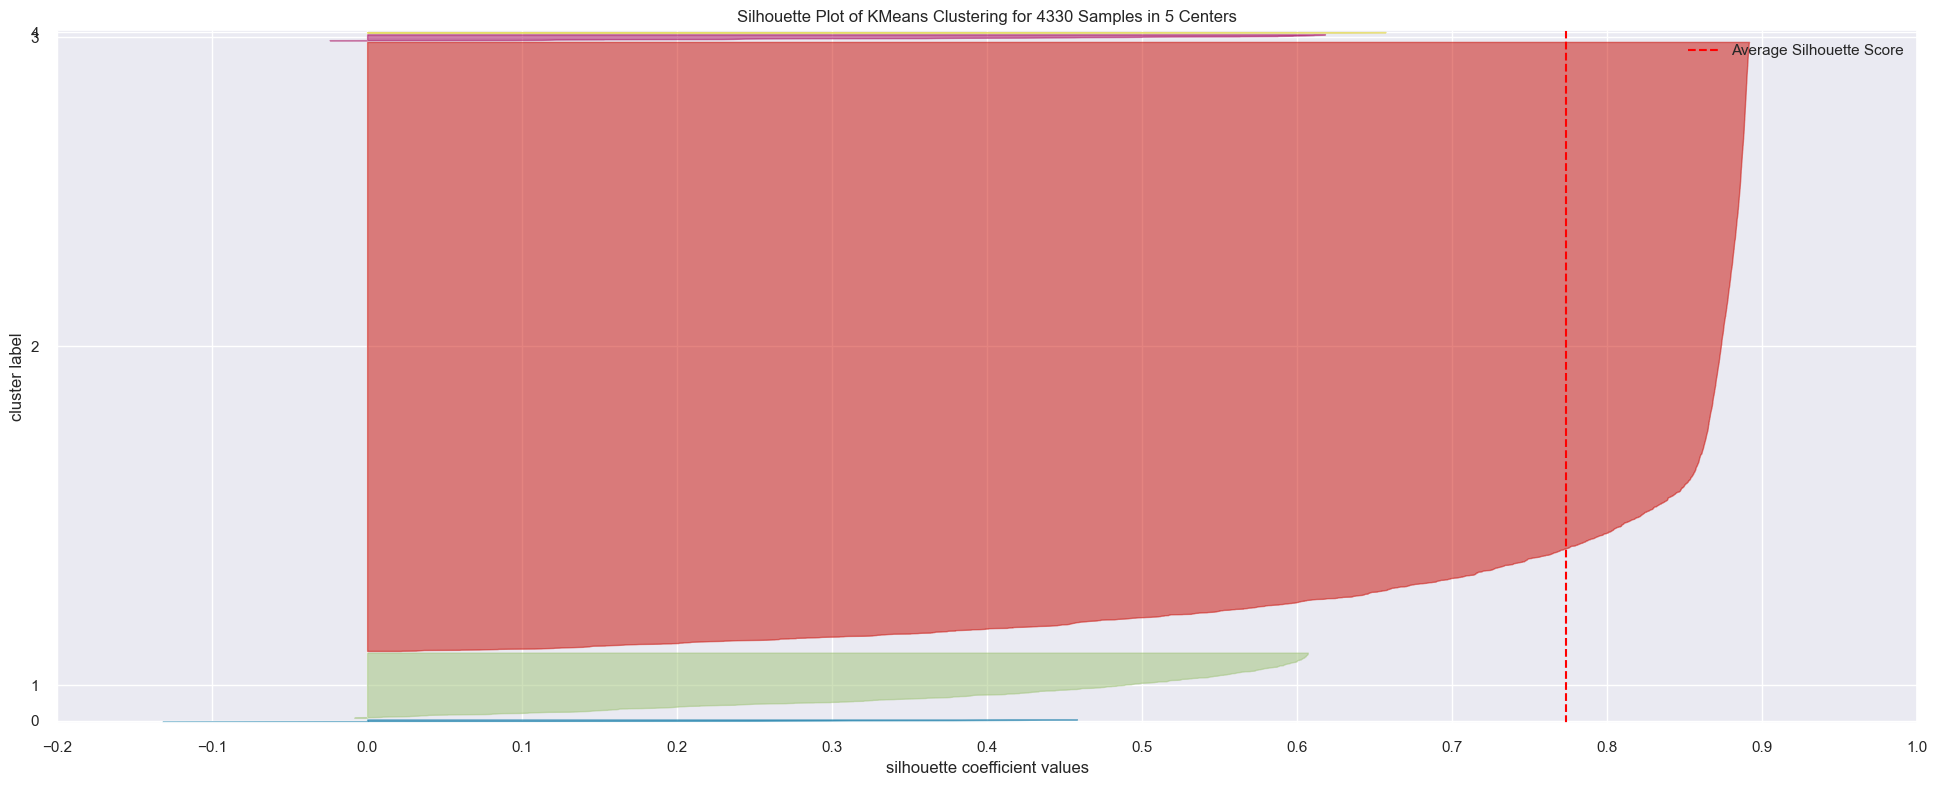

In [105]:
visualizer = SilhouetteVisualizer( kmeans, colors='yellowbrick' )
visualizer.fit( X )
visualizer.finalize()

### 9.2. 2D Plot

In [106]:
df9.head(10)

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5391.21,372.0,34.0,18.152222,1
1,13047,3232.59,56.0,9.0,18.904035,2
2,12583,6705.38,2.0,15.0,28.902500,1
3,13748,948.25,95.0,5.0,33.866071,2
4,15100,876.00,333.0,3.0,292.000000,2
5,15291,4623.30,25.0,14.0,45.326471,1
6,14688,5630.87,7.0,21.0,17.219786,1
7,17809,5411.91,16.0,12.0,88.719836,1
8,15311,60767.90,0.0,91.0,25.543464,0
9,16098,2005.63,87.0,7.0,29.934776,2


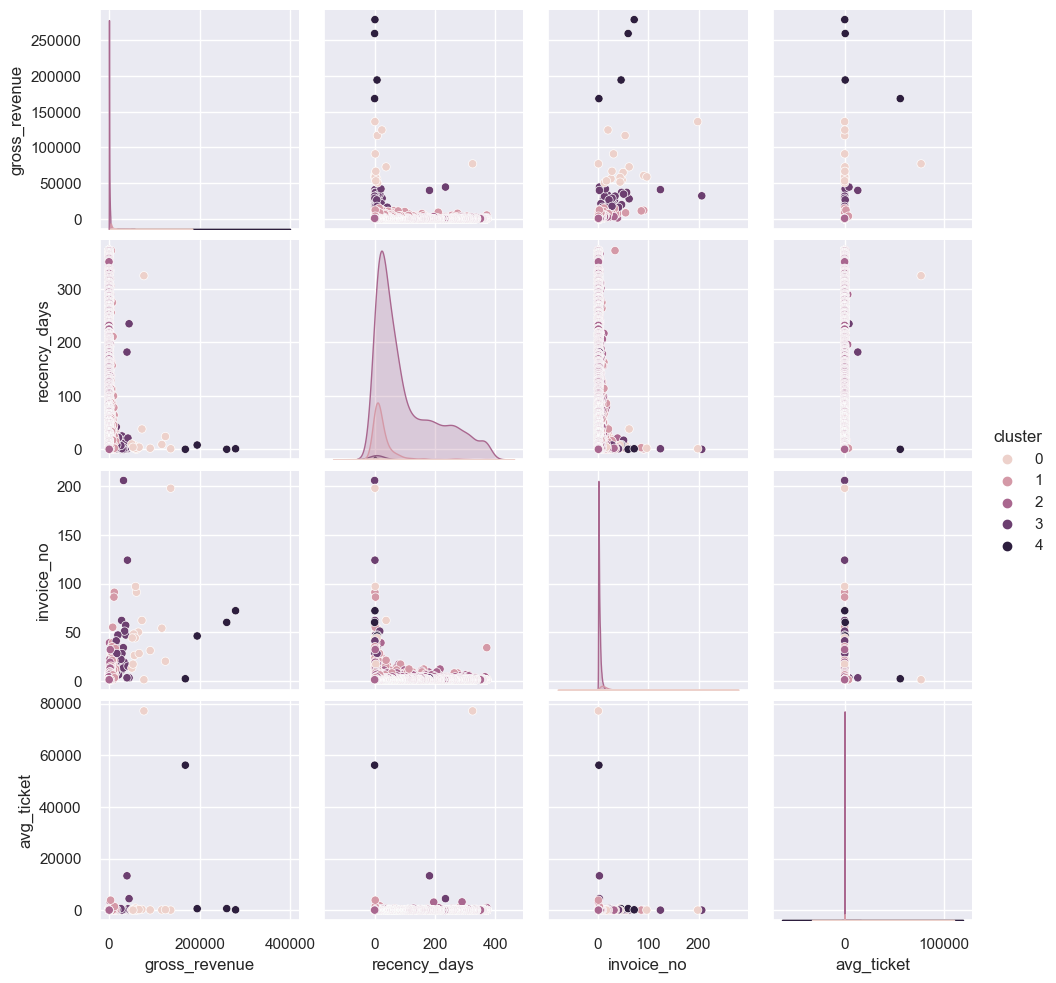

In [107]:
df_viz = df9.drop( columns='customer_id', axis=1 )
sns.pairplot( df_viz, hue='cluster' )


### 9.3. UMAP

In [108]:
X.head()

,gross_revenue,recency_days,invoice_no,avg_ticket
0,5391.21,372.0,34.0,18.152222
1,3232.59,56.0,9.0,18.904035
2,6705.38,2.0,15.0,28.902500
3,948.25,95.0,5.0,33.866071
4,876.00,333.0,3.0,292.000000


<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

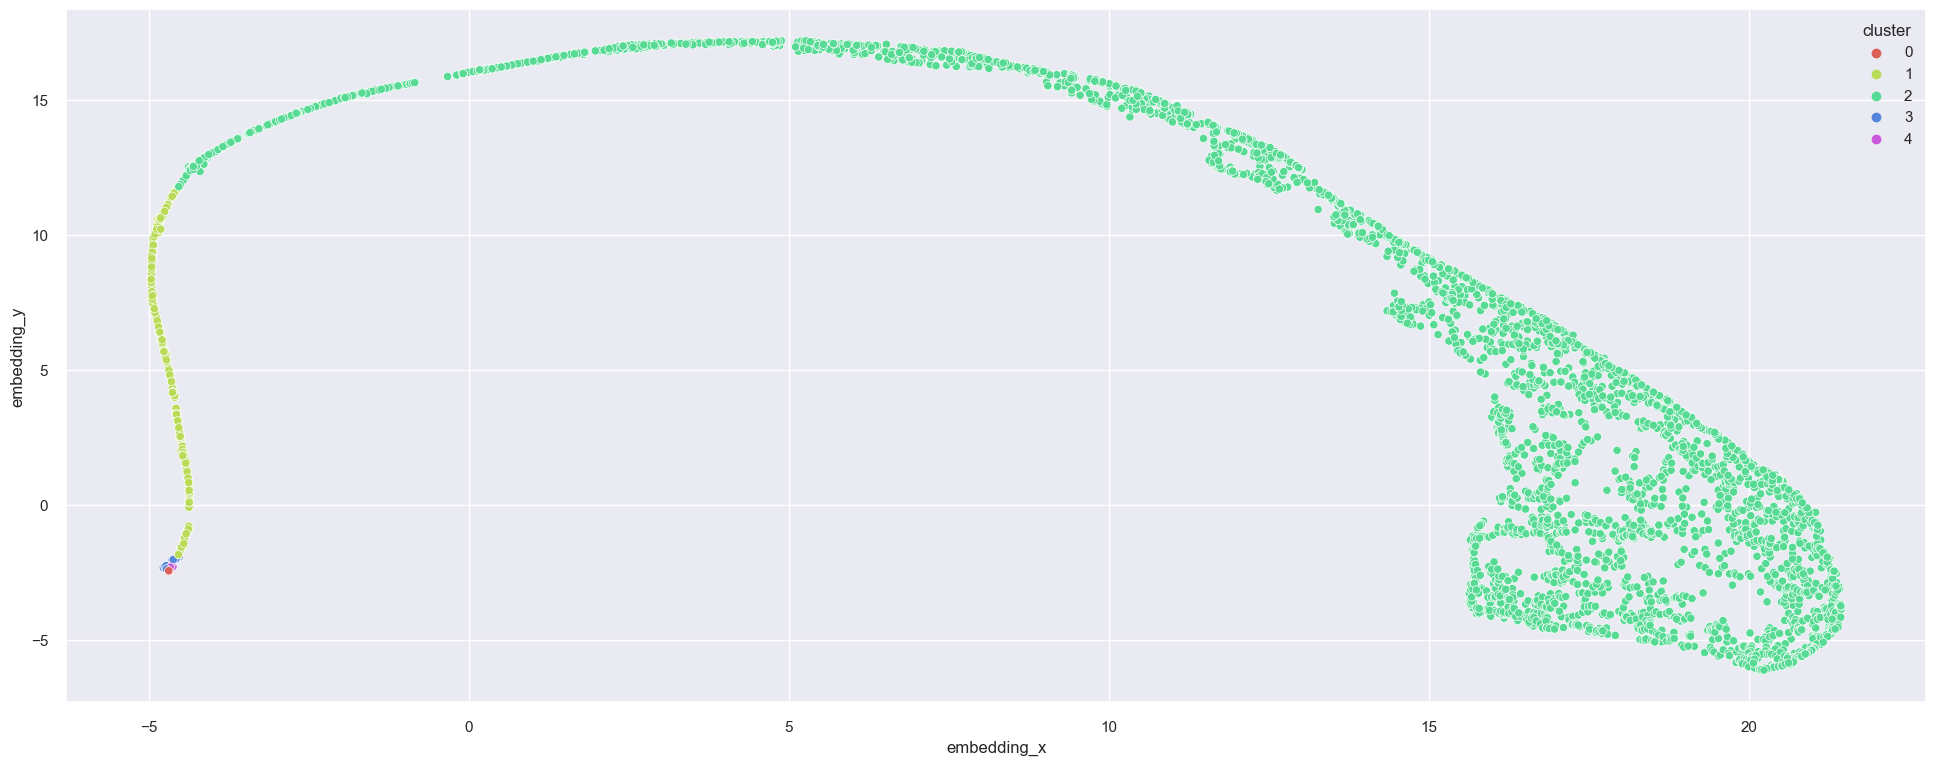

In [109]:
reducer = umap.UMAP( n_neighbors=80, random_state = 42 )
embedding = reducer.fit_transform( X ) # espaço projetado

# embeddind
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

# plot UMAP
sns.scatterplot( x='embedding_x', y='embedding_y', hue='cluster', palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ), data=df_viz )


### 9.2. Cluster Profile

In [46]:
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,avg_ticket,cluster
0,17850,5288.63,302,35,16.950737,3
1,13047,3079.10,31,18,15.709694,0
2,12583,7187.34,2,18,28.634821,3
3,13748,948.25,95,5,33.866071,0
4,15100,635.10,330,6,105.850000,0


In [45]:
# Number of Customer
df_cluster = df9[['customer_id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_cluster'] = 100 * ( df_cluster['customer_id'] / df_cluster['customer_id'].sum() )

# Average Gross Revenue
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_gross_revenue, how='inner', on='cluster')

# Average Recency Days
df_avg_recency_days = df9[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_recency_days, how='inner', on='cluster')

# Average Invoice_no
df_invoice_no = df9[['invoice_no', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge( df_cluster, df_invoice_no, how='inner', on='cluster')

# Avg Ticket
df_ticket = df9[['avg_ticket', 'cluster' ]].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_ticket, how='inner', on='cluster' )

df_cluster

,cluster,customer_id,perc_cluster,gross_revenue,recency_days,invoice_no,avg_ticket
0,0,4071,93.115279,946.696250,96.969295,3.641120,25.359654
1,1,6,0.137237,182181.981667,7.166667,89.000000,253.626345
2,2,28,0.640439,42614.387143,6.178571,57.821429,162.862605
3,3,267,6.107045,8089.028652,20.280899,19.528090,62.783157


### Cluster 01: ( Candidato à Insider )
    - Número de customers: 6 ( 14% dos customers )
    - Recência em média: 7 dias
    - Compras em média: 89 compras
    - Receita em média: $182.182,00

### Cluster 02:
    - Número de customers: 31 ( 71% dos customers )
    - Recência em média: 14 dias
    - Compras em média: 53 compras
    - Receita em média: $40.543,52

### Cluster 03:
    - Número de customers: 4335 ( 99% dos customers )
    - Recência em média: 92 dias
    - Compras em média: 5 compras
    - Receita em média: $1.372,57

## <font color='red'> 10.0 Deploy To Production </font>